# Libraries

In [6]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use(["ggplot"])
%matplotlib inline

# Data Pre-Processing

Read the dataset, replace *unknown* with *NaN*, and drop all *NaN* values.

In [7]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df = df.replace("unknown",np.nan)
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Identify which columns are numerical and categorical.

In [8]:
!pip install dython
from dython.nominal import identify_numeric_columns,identify_nominal_columns

cat_columns,num_columns = identify_nominal_columns(df),identify_numeric_columns(df)
for i,j in zip(["Categorical Columns","Numerical Columns"],[cat_columns,num_columns]):
    print(f"{i}\t: {j}")

Categorical Columns	: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Columns	: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


To find correlation between numerical and categorical variables, we can use the help of *Dython* library.

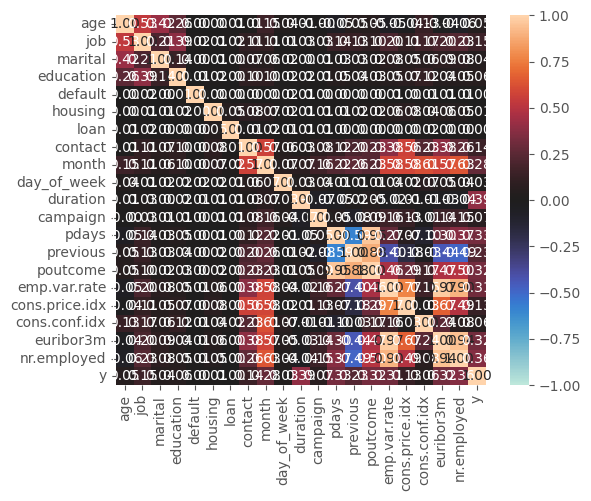

In [9]:
from dython.nominal import associations

corr = associations(df)

Since we only want to see the correlation of features and target, we can slice and take the *y* column.

In [10]:
df_corr = corr["corr"][["y"]].iloc[:-1].sort_values("y",ascending=False)
df_corr.style.background_gradient(cmap="autumn_r",axis=None)

,y
duration,0.393530
nr.employed,0.364230
pdays,0.327509
poutcome,0.322919
euribor3m,0.315869
emp.var.rate,0.305365
month,0.277624
previous,0.228003
job,0.153701
contact,0.143642


According to [PH717 Module 9 - Correlation and Regression](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html), the strength of correlation coefficients can be described as follows:

| Correlation Coefficient | Decription |
| :---: | :---: |
| 1.0 | Perfect Positive |
| 0.8 to 1.0 | Very Strong |
| 0.6 to 0.8 | Strong |
| 0.4 to 0.6 | Moderate |
| 0.2 to 0.4 | Weak |
| 0.0 to 0.2 | Very Weak |
| 0.0 to -0.2 | Very Weak |
| -0.2 to -0.4 | Weak |
| -0.4 to -0.6 | Moderate |
| -0.6 to -0.8 | Strong |
| -0.8 to -1.0 | Very Strong |
| -1.0 | Perfect Negative |

Based on the table above, it can be seen that there are 8 variables that have weak-to-moderate correlation (highlighted in blue) and 12 variables that have very weak correlation (highlighted in lightblue).

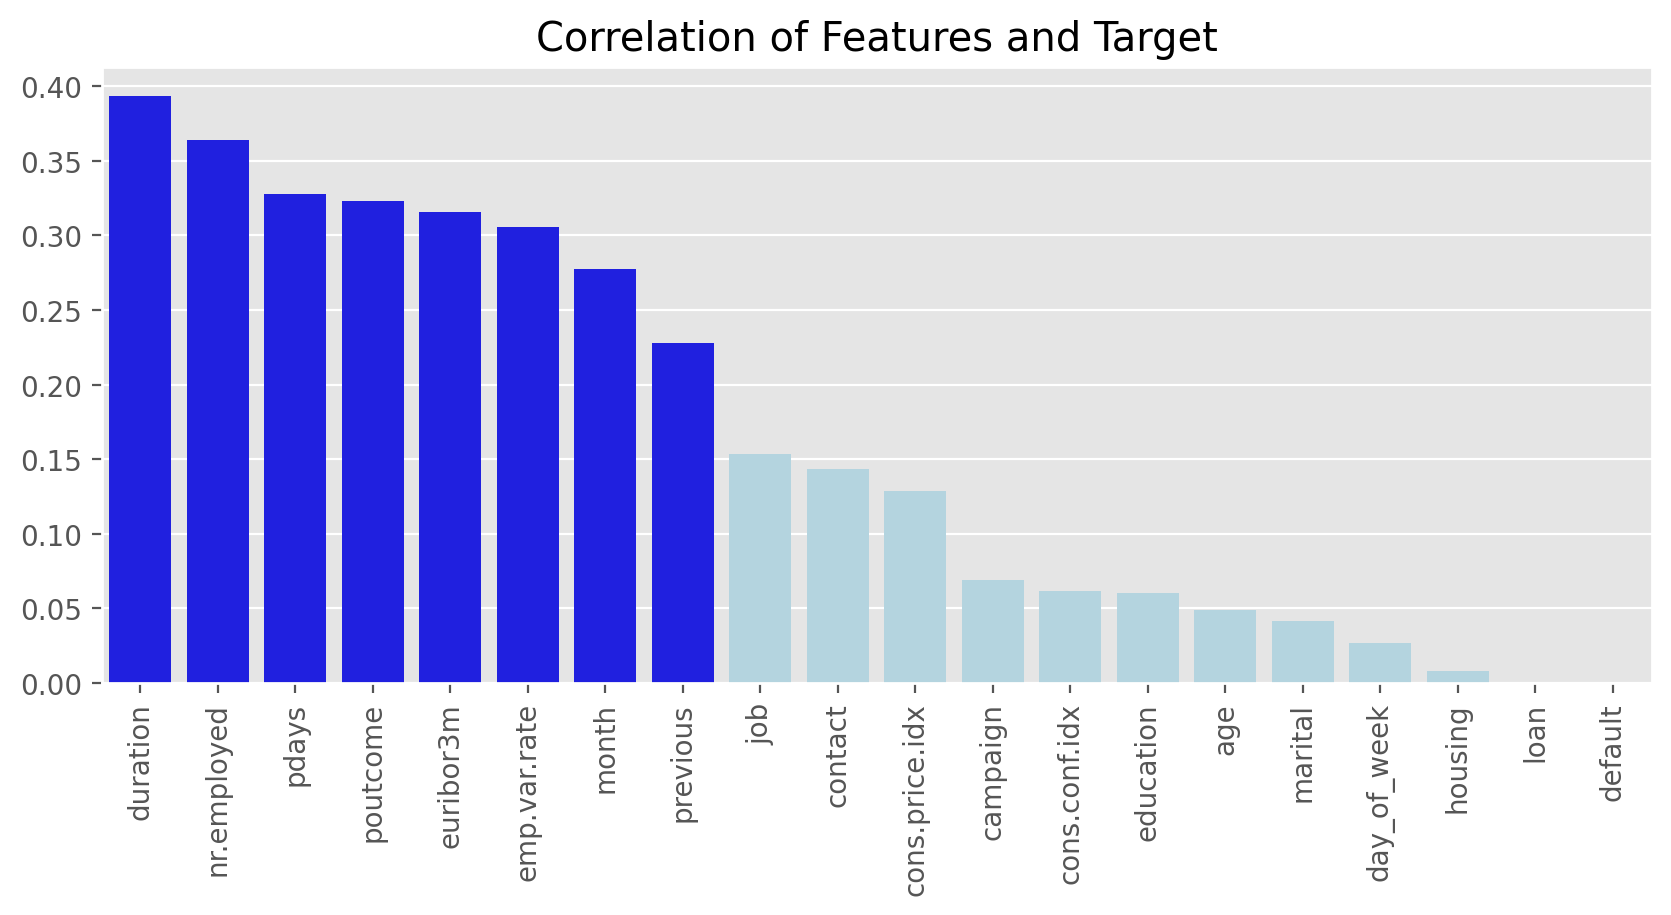

In [11]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=df_corr,x=df_corr.index,y="y",palette=["blue" if i >= 0.2 else "lightblue" for i in df_corr["y"]])
plt.title("Correlation of Features and Target")
plt.xticks(rotation=90)
plt.ylabel("")
plt.show()

Remove the 12 variables that have very weak correlation.

In [12]:
df = df[list(df_corr[df_corr["y"] >= 0.2].index) + ["y"]]
df.head()

,duration,nr.employed,pdays,poutcome,euribor3m,emp.var.rate,month,previous,y
0,261,5191.0,999,nonexistent,4.857,1.1,may,0,no
2,226,5191.0,999,nonexistent,4.857,1.1,may,0,no
3,151,5191.0,999,nonexistent,4.857,1.1,may,0,no
4,307,5191.0,999,nonexistent,4.857,1.1,may,0,no
6,139,5191.0,999,nonexistent,4.857,1.1,may,0,no


Define independent and dependent variables.

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.drop("y",axis=1).copy().apply(le.fit_transform)
y = df["y"].copy()

Split the dataset into training and testing datasets.

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 21341
Testing dataset		: 9147


Standardize all of the independent variables.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression

Create a logistic regression model.

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight="balanced",random_state=42,max_iter=5000)
log_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

Predict using the logistic regression model.

In [17]:
log_pred = log_model.predict(scaled_X_test)

Evaluate the logistic regression model.

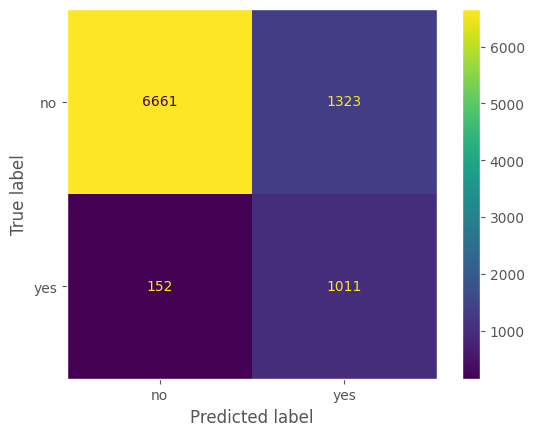

Accuracy Score: 83.87449436973871%


In [18]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,log_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,log_pred)*100}%")

Create the final logistic regression model by fitting the whole dataset.

In [19]:
final_log_model = LogisticRegression(class_weight="balanced",random_state=42,max_iter=5000)
final_log_model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

Show the beta coefficients of the logistic regression model.

In [20]:
pd.DataFrame(
    data=[final_log_model.intercept_[0]] + list(final_log_model.coef_[0]),
    columns=["Unstandardized Coefficients"],
    index=["Constant"] + list(X.columns)
)

,Unstandardized Coefficients
Constant,2.436827
duration,0.006553
nr.employed,-0.289997
pdays,-0.050950
poutcome,0.544042
euribor3m,-0.002250
emp.var.rate,-0.210972
month,-0.127496
previous,-0.031924


Write the equation of the logistic regression model where:
$$ \pi(x) = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}} $$

In [21]:
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(final_log_model.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(final_log_model.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(0.006553*(duration) - 0.210972*(emp.var.rate) - 0.00225*(euribor3m) - 0.127496*(month) - 0.289997*(nr.employed) - 0.05095*(pdays) + 0.544042*(poutcome) - 0.031924*(previous) + 2.436827)/(e**(0.006553*(duration) - 0.210972*(emp.var.rate) - 0.00225*(euribor3m) - 0.127496*(month) - 0.289997*(nr.employed) - 0.05095*(pdays) + 0.544042*(poutcome) - 0.031924*(previous) + 2.436827) + 1))

# K-Nearest Neighbors

Find the optimal *K* value by comparing *K* values with their error rates.

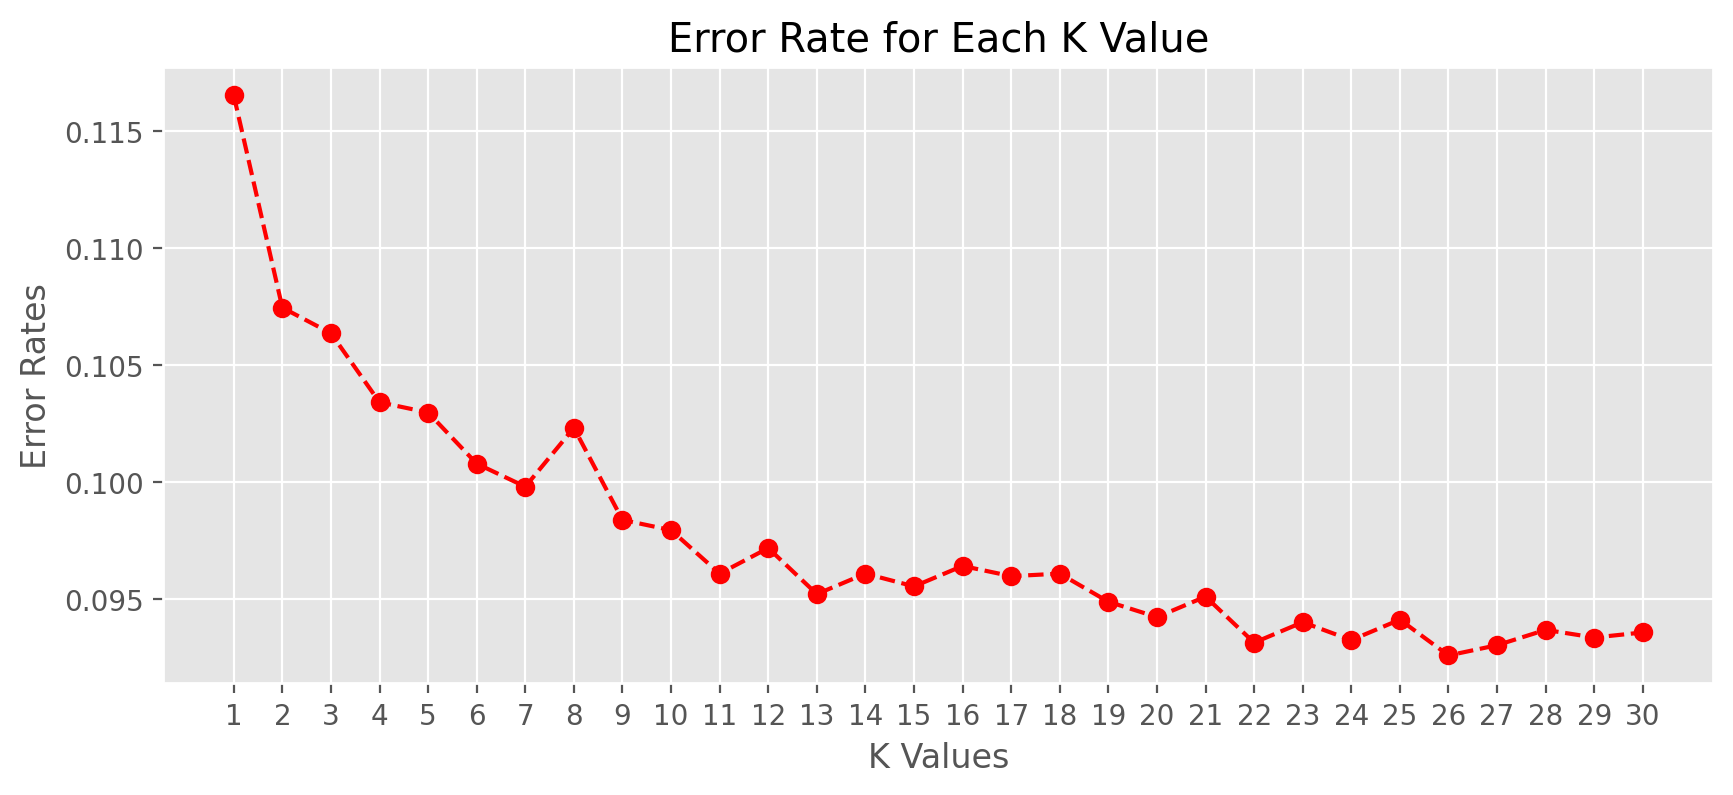

In [22]:
from sklearn.neighbors import KNeighborsClassifier

errors = []
for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),errors,color="red",marker="o",ls="--")
plt.title("Error Rate for Each K Value")
plt.xlabel("K Values")
plt.xticks(range(1,31))
plt.ylabel("Error Rates")
plt.show()

Based on the plot above, it can be seen that the optimal *K* value is 5. Thus, create a KNN model with *K* = 5.

In [23]:
k = 7
knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

Predict using the KNN model.

In [24]:
knn_pred = knn_model.predict(scaled_X_test)

Evaluate the KNN model.

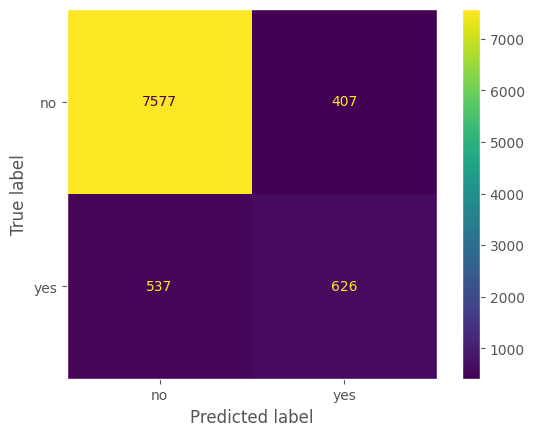

Accuracy Score: 89.67967639663279%


In [25]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,knn_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,knn_pred)*100}%")

Create the final KNN model by fitting the whole dataset.

In [26]:
final_knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
final_knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=7, weights='distance')

# Support Vector Machine

Create a SVM model.

In [27]:
from sklearn.svm import SVC

svm_model = SVC(class_weight="balanced",random_state=42)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=42)

Predict using the SVM model.

In [28]:
svm_pred = svm_model.predict(scaled_X_test)

Evaluate the SVM model.

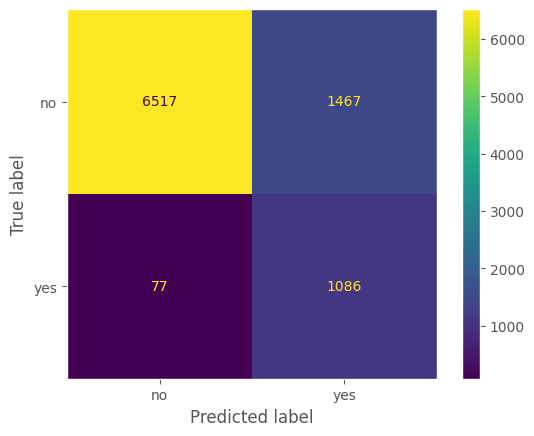

Accuracy Score: 83.12014868262818%


In [29]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,svm_pred)*100}%")

Create the final SVM model by fitting the whole dataset.

In [30]:
final_svm_model = SVC(class_weight="balanced",random_state=42)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=42)

# Decision Tree

Create a decision tree model.

In [31]:
from sklearn.tree import DecisionTreeClassifier

dec_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)
dec_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

Predict using the decision tree model.

In [32]:
dec_pred = dec_model.predict(scaled_X_test)

Evaluate the decision tree model.

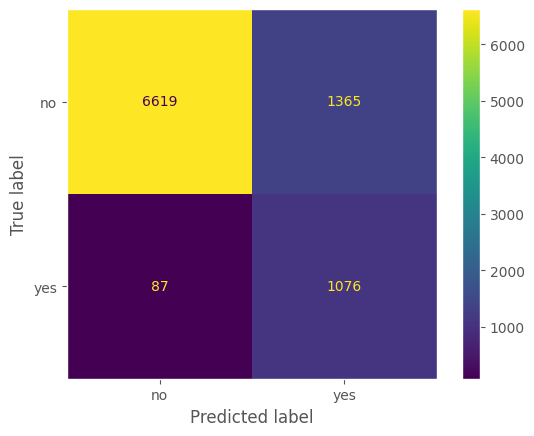

Accuracy Score: 84.12594293210888%


In [33]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,dec_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,dec_pred)*100}%")

Show each feature importance based on the decision tree model.

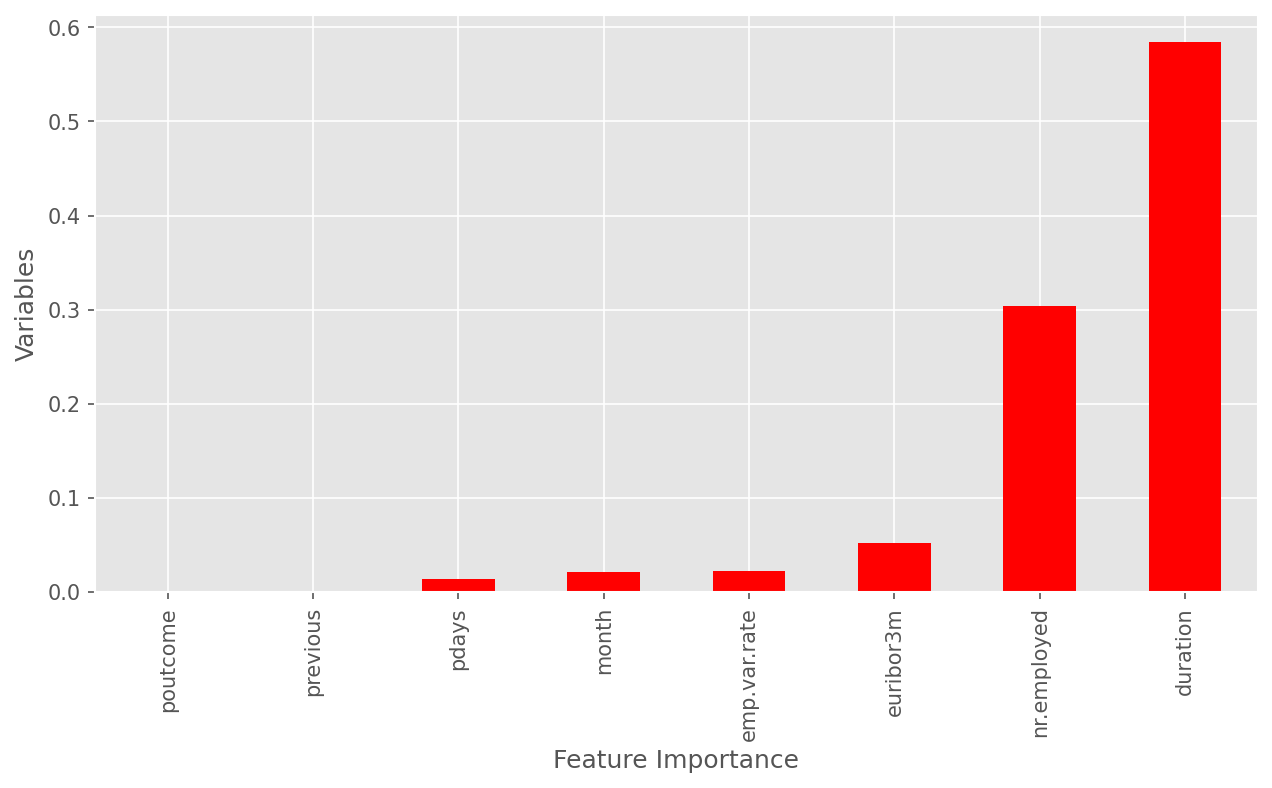

In [34]:
fig = plt.figure(dpi=150)
pd.DataFrame(
    data=dec_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
).sort_values("Feature Importance",ascending=True).plot(
    figsize=(10,5),
    kind="bar",
    legend=None,
    color="red",
    ax=plt.gca()
)
plt.xlabel("Feature Importance")
plt.ylabel("Variables")
plt.show()

Create the final decision tree model by fitting the whole dataset and visualize it.

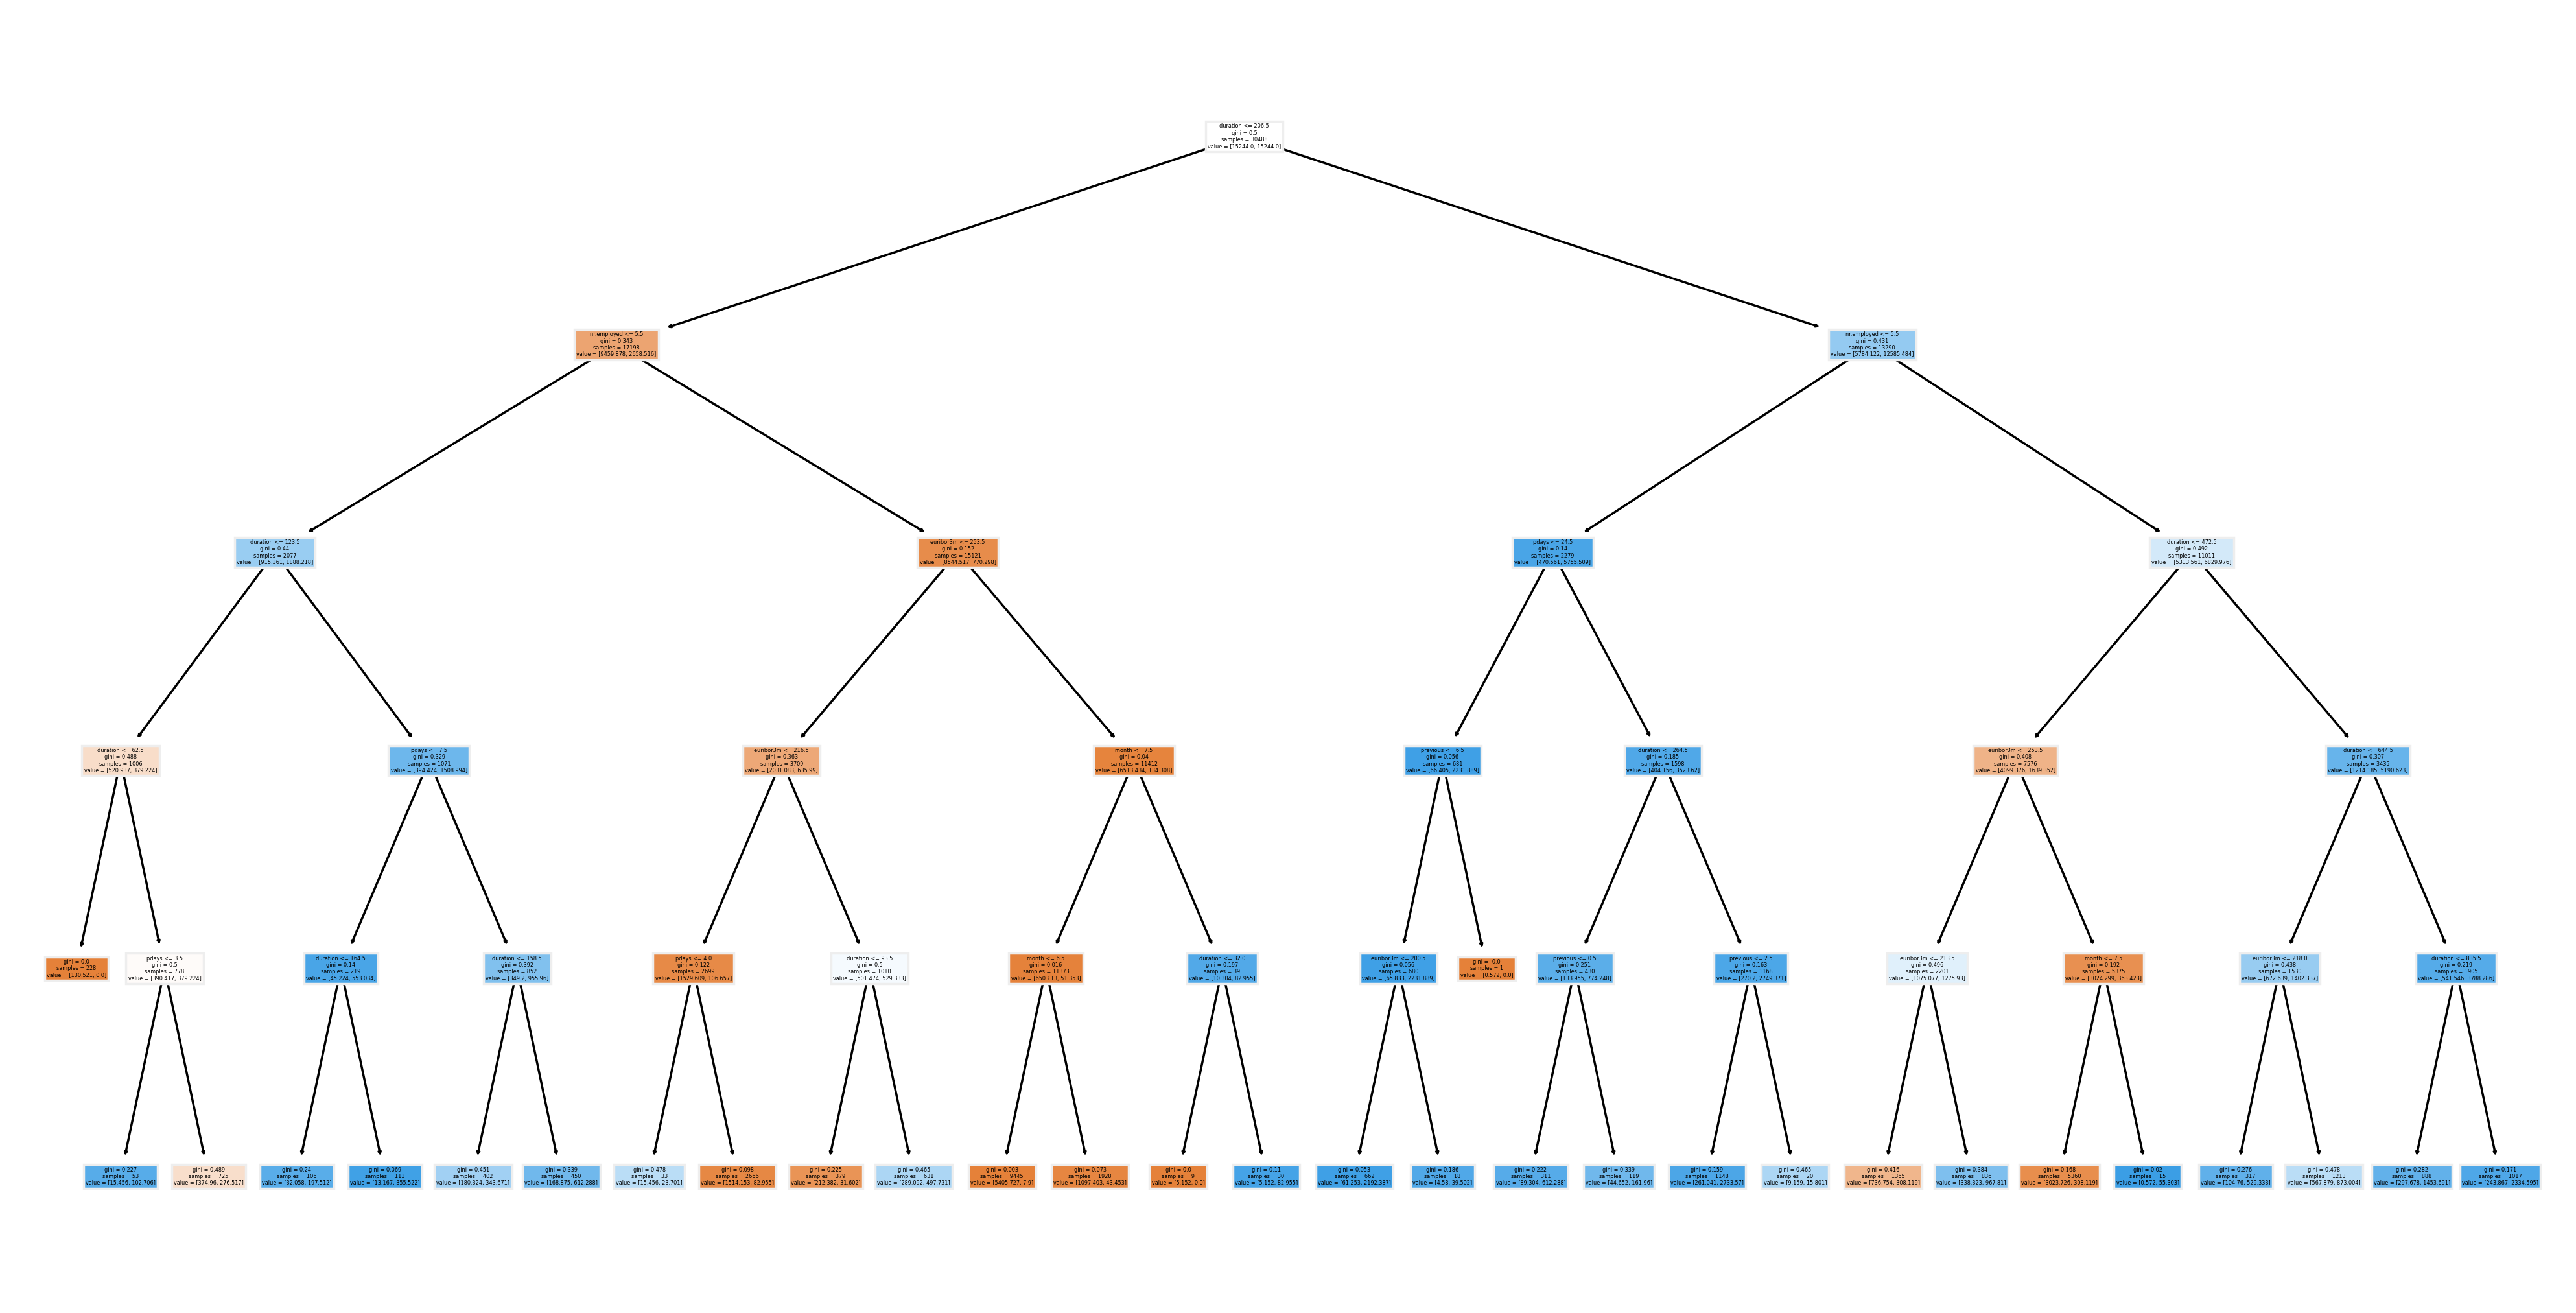

In [35]:
from sklearn.tree import plot_tree

final_dec_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)
final_dec_model.fit(X,y)

plt.figure(figsize=(10,5),dpi=500)
plot_tree(final_dec_model,filled=True,feature_names=X.columns)
plt.show()

# Random Forest

Find the optimal number of trees by comparing numbers of trees with their error rates.

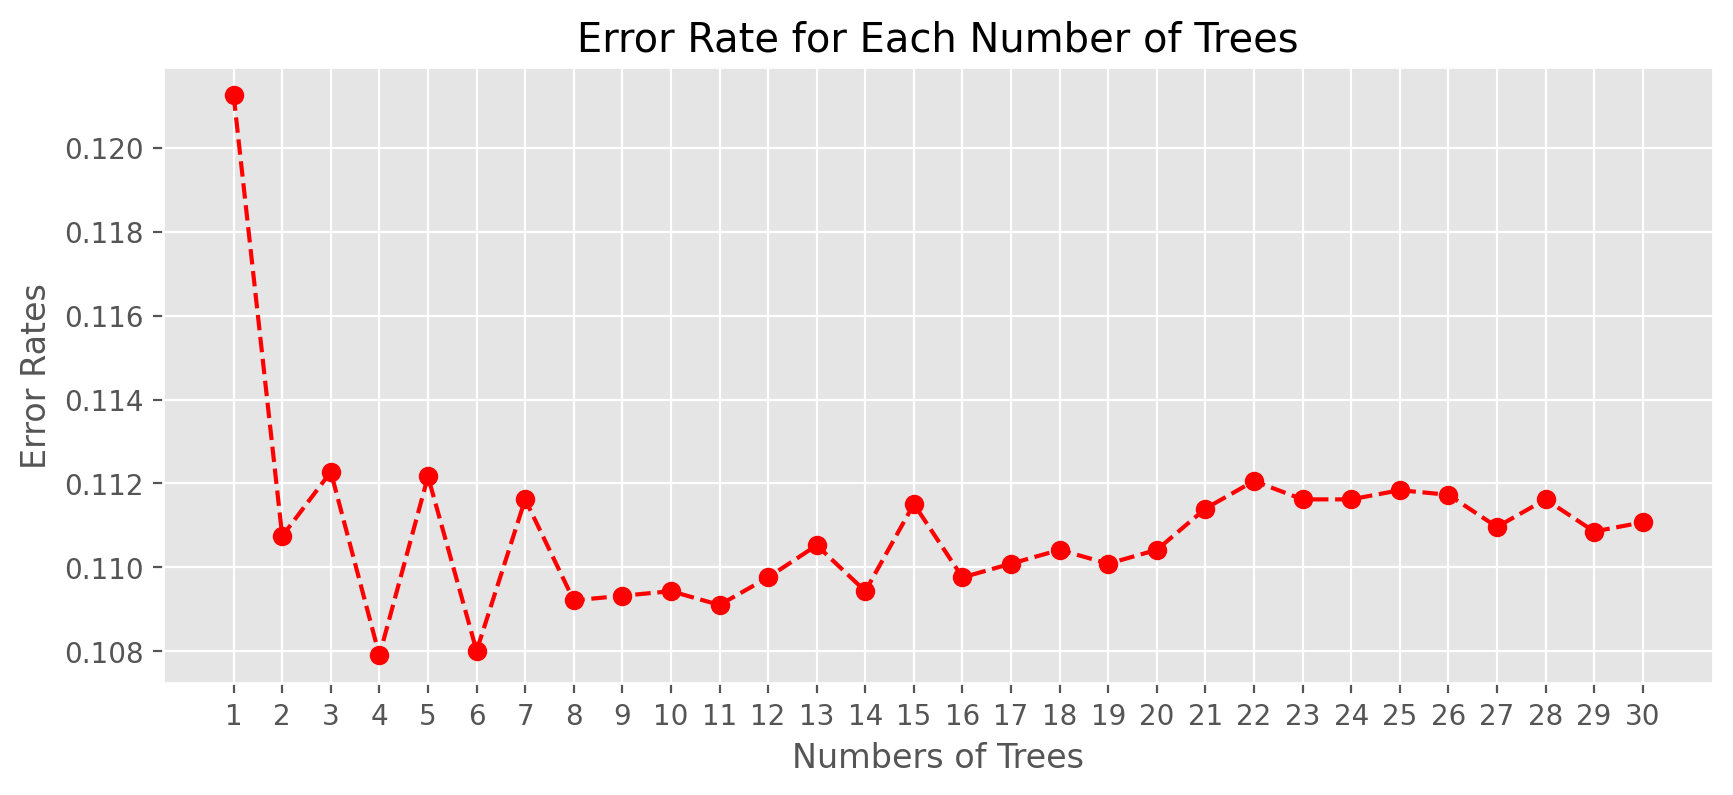

In [36]:
from sklearn.ensemble import RandomForestClassifier

errors = []
for i in range(1,31):
    model = RandomForestClassifier(n_estimators=i,class_weight="balanced",random_state=42)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),errors,color="red",marker="o",ls="--")
plt.title("Error Rate for Each Number of Trees")
plt.xlabel("Numbers of Trees")
plt.xticks(range(1,31))
plt.ylabel("Error Rates")
plt.show()

Based on the plot above, it can be seen that the optimal number of trees is 5. Thus, create a random forest model with number of trees = 5.

In [37]:
n = 4
ran_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=42)
ran_model.fit(scaled_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=4, random_state=42)

Predict using the random forest model.

In [38]:
ran_pred = ran_model.predict(scaled_X_test)

Evaluate the random forest model.

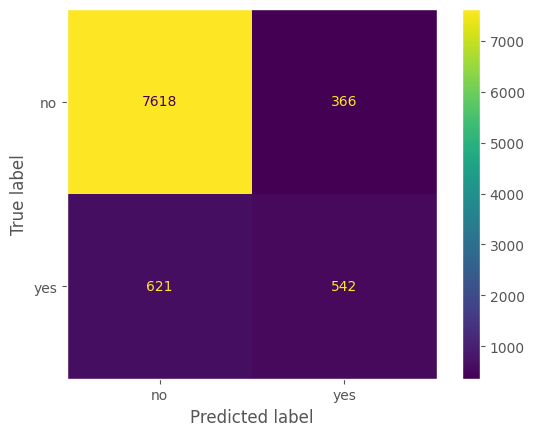

Accuracy Score: 89.20957691046245%


In [39]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,ran_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,ran_pred)*100}%")

Show each feature importance based on the random forest model.

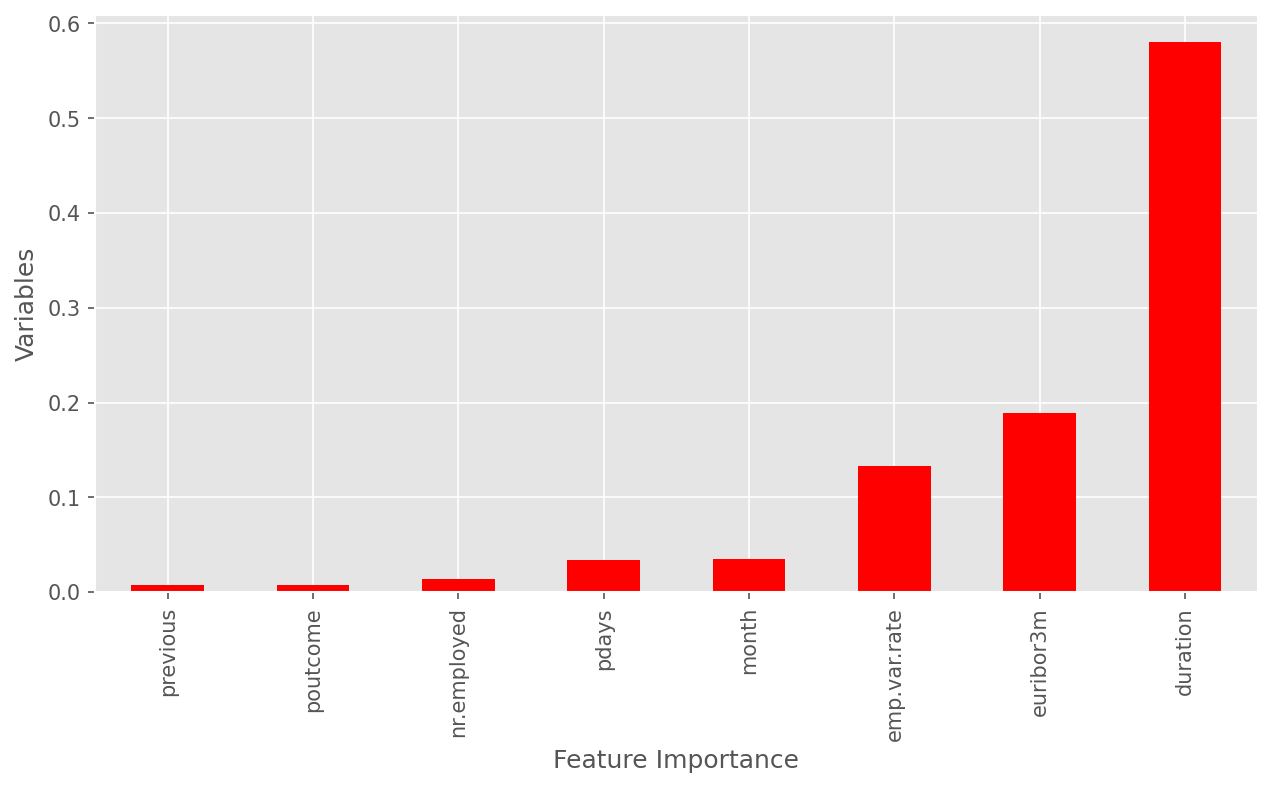

In [40]:
fig = plt.figure(dpi=150)
pd.DataFrame(
    data=ran_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
).sort_values("Feature Importance",ascending=True).plot(
    figsize=(10,5),
    kind="bar",
    legend=None,
    color="red",
    ax=plt.gca()
)
plt.xlabel("Feature Importance")
plt.ylabel("Variables")
plt.show()

Create the final random forest model by fitting the whole dataset.

In [41]:
final_ran_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=42)
final_ran_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=4, random_state=42)

# Naive Bayes

Create a naive bayes model.

In [42]:
from sklearn.naive_bayes import BernoulliNB

naive_model = BernoulliNB()
naive_model.fit(scaled_X_train,y_train)

BernoulliNB()

Predict using the naive bayes model.

In [43]:
naive_pred = naive_model.predict(scaled_X_test)

Evaluate the naive bayes model.

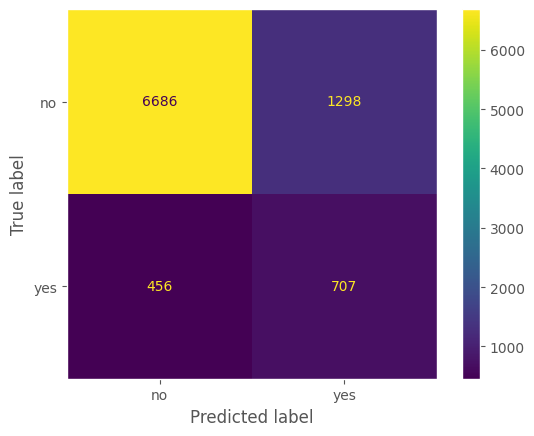

Accuracy Score: 80.82431398272658%


In [44]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,naive_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,naive_pred)*100}%")

Create the final naive bayes model by fitting the whole dataset.

In [45]:
final_naive_model = BernoulliNB()
final_naive_model.fit(X,y)

BernoulliNB()

# Conclusion

Even though the KNN and random forest models have higher accuracy scores than the other models, it can be seen that they only predicted a small portion of the *yes* label right. In other words, those 2 models are inaccurate and thus can't be used. For the remaining models, the decision tree model has the highest accuracy score, which is 84.1259%. So, it can be concluded that the decision tree model is the best model for this case.

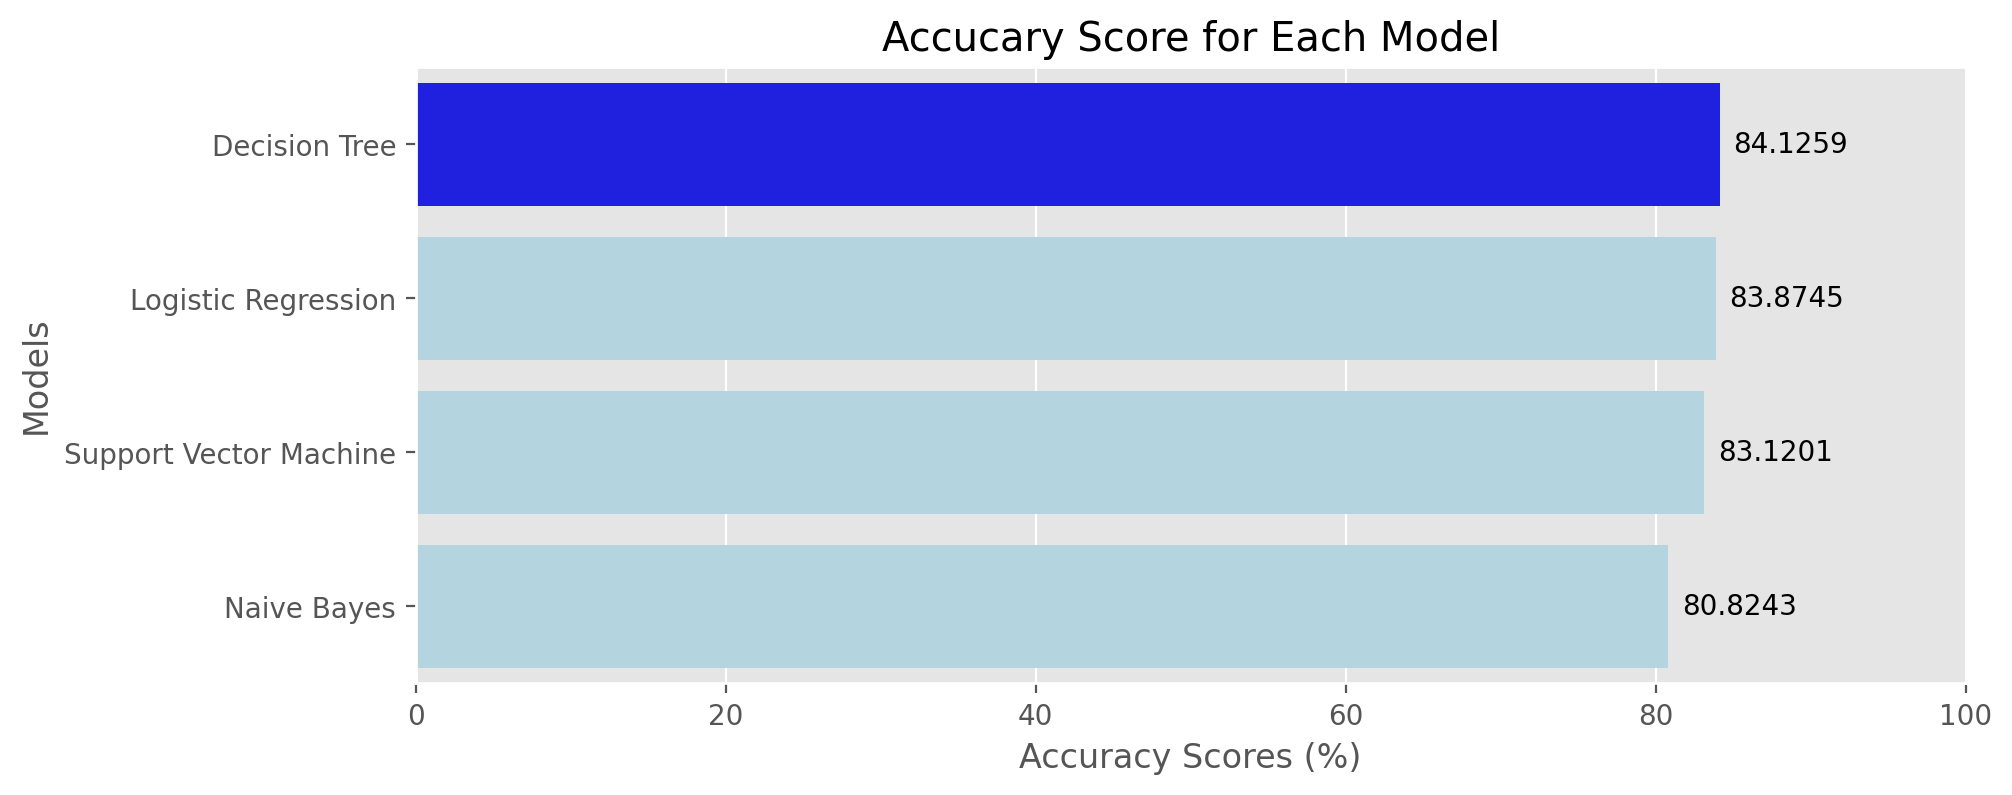

In [46]:
preds = [log_pred,svm_pred,dec_pred,naive_pred]
models = ["Logistic Regression","Support Vector Machine","Decision Tree","Naive Bayes"]
accuracy_scores = [accuracy_score(y_test,i)*100 for i in preds]

comparison = pd.DataFrame(
    data=accuracy_scores,columns=["Accuracy Scores"],index=models
).sort_values("Accuracy Scores",ascending=False)

plt.figure(figsize=(10,4),dpi=200)
barplot = sns.barplot(
    data=comparison,
    x="Accuracy Scores",
    y=comparison.index,
    orient="h",
    palette=["blue" if i == comparison.head(1).iloc[0,0] else "lightblue" for i in comparison["Accuracy Scores"]]
)
for bars in barplot.containers:
    barplot.bar_label(bars,padding=5)
plt.title("Accucary Score for Each Model")
plt.xlabel("Accuracy Scores (%)")
plt.ylabel("Models")
plt.xlim(xmax=100)
plt.show()

Compare the actual value to each model's prediction.

In [47]:
pd.DataFrame(data=np.stack(preds,axis=1),columns=models,index=y_test.values).rename_axis(index="Actual Values")

,Logistic Regression,Support Vector Machine,Decision Tree,Naive Bayes
Actual Values,,,,
no,no,no,no,no
no,no,no,no,no
no,no,no,no,no
no,no,no,no,no
no,no,yes,yes,no
...,...,...,...,...
no,no,no,no,no
no,yes,yes,no,yes
no,no,no,no,no


Save all the final models for future use.

In [50]:
from joblib import dump

final_models = [final_log_model,final_knn_model,final_svm_model,
                final_dec_model,final_ran_model,final_naive_model]
file_names = ["logistic_regression","knn","svm","decision_tree","random_forest","naive_bayes"]

for i,j in zip(final_models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been downloaded!")

logistic_regression.joblib has been downloaded!
knn.joblib has been downloaded!
svm.joblib has been downloaded!
decision_tree.joblib has been downloaded!
random_forest.joblib has been downloaded!
naive_bayes.joblib has been downloaded!
